# Monte Carlo methods

Philipp Schlatter, LSTM FAU, 2024

In [1]:
%%html
<style>
div.jupyter-widgets.widget-label {display: none;}
</style>

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import norm,uniform,binom

π=mt.pi

## Simple Monte Carlo method: Compute π

The standard example of a Monte Carlo method: Compute $\pi$ by randomly drawing samples for two uniform distributions between $-1$ and $+1$ and checking whether or not these points are inside a circle with radius $1$. The total area of the square is 4, and the area occupied by the circle is $\pi$. Therefore, the fraction of points inside corresponds then to $\pi/4$.

This method is related to the *rejection sampling method*, which we will not consider further here. 

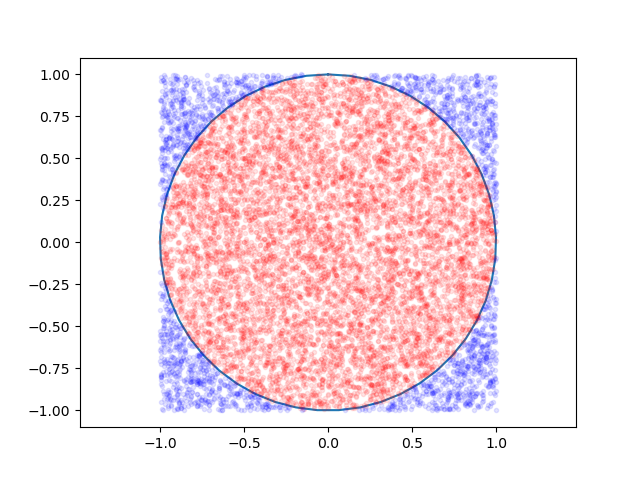

Estimate of π with 10000 samples is: 3.149600


In [3]:
N = 10000
x = (np.random.random_sample(N)-0.5)*2
y = (np.random.random_sample(N)-0.5)*2
count = 0
xin = []; yin=[];
xout = []; yout=[];
for i in range(N):
    if ((x[i]**2+y[i]**2)<1):
        count = count + 1    
        xin.append(x[i])
        yin.append(y[i])
    else:
        xout.append(x[i])
        yout.append(y[i])
        

plt.figure()
# plt.plot(x[:1000],y[:1000],'.')
t=np.linspace(0,100)
plt.plot(np.sin(t*2*π/100),np.cos(t*2*π/100))
plt.axis('equal')
plt.plot(xin,yin,'r.',alpha=0.1)
plt.plot(xout,yout,'b.',alpha=0.1)
plt.show()
        
print('Estimate of π with %i samples is: %.6f' % (N,(count/N)*4))  

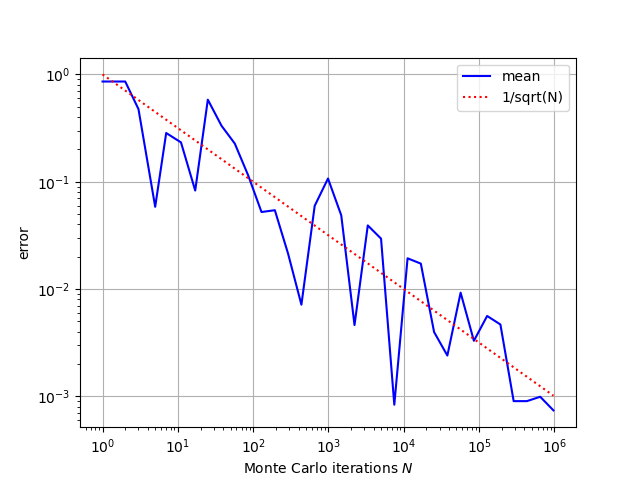

In [4]:
# check convergence of a simple Monte Carlo method

Ne = 34
cc = np.zeros(Ne)
mm = np.zeros(Ne)
for j in range(Ne):
    N = int(1.5**(j+1))
    cc[j] = N
    x = (np.random.random_sample(N)-0.5)*2
    y = (np.random.random_sample(N)-0.5)*2
    
    count = 0
    for i in range(N):
        if ((x[i]**2+y[i]**2)<1):
            count = count + 1    
    mm[j] = np.abs(count/N*4-π)
    
plt.figure()
plt.loglog(cc,mm,'b',label='mean')
plt.loglog(cc,1/np.sqrt(cc),'r:',label='1/sqrt(N)')
plt.grid('on')
plt.xlabel('Monte Carlo iterations $N$');plt.ylabel('error')
plt.legend()
plt.show()


The convergence of a Monte Carlo method is typically quite slow, in this case as usual proportional to the square root $\sqrt{N}$ of the number of iterations $N$.

## Example: Nonlinear error propagation

Consider the model $y = 5 \sqrt{x}$ where the error propagation from $x$ to $y$ should be studied. Linearisation (the Taylor series method) gives an absolute uncertainty $u_y^2$

$$ u_y^2 = \sum_{i=1}^K \left( u_{x_i} \frac{\partial y}{\partial x_i}  \right)^2 \ . $$

For our case, we get the following expression with $K=1$, $x_1=x$:

$$u_y = \frac{5}{2\sqrt{x}} u_x \ ,$$

and a relative uncertainty

$$\frac{u_y}{y} = \frac{1}{2}\frac{u_x}{x} \ .$$

We take $x=1$ and measure $y=5$. Assuming an uncertainty in $x$ of $u_x/x=1\%$ gives us the corresponding uncertainty in $y$ as $u_y/u=0.5\%$, or in absolute numbers $u_y=0.025$ for $u_x=0.01$. 


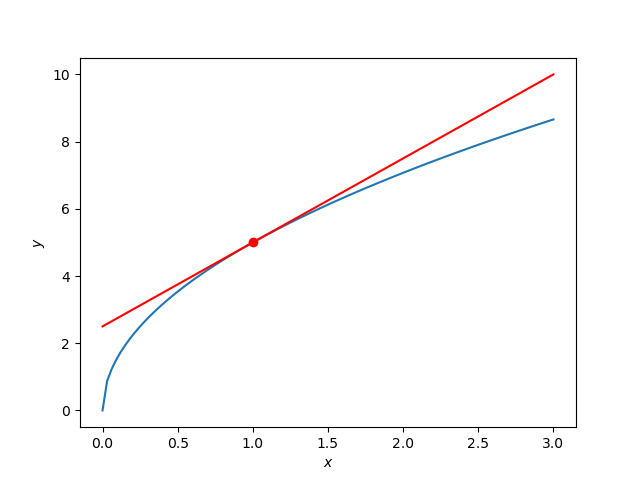

In [5]:
x = np.linspace(0,3,100)
y = lambda x: 5*np.sqrt(np.abs(x))

plt.figure()
plt.plot()
plt.plot(x,y(x))
plt.plot(1,y(1),'ro')
plt.plot(x,5+5/2*(x-1),'r')
plt.xlabel('$x$');plt.ylabel('$y$')
plt.show()

For the Monte Carlo method we assume that the uncertainty is Gaussian with zero mean and variance $u_x^2$. So we sample $\tilde{y} = 5 \tilde{x}^{1/2}$ with $\tilde{x}=1+\mathcal{N}(0,u_x^2)$.

In the below example, setting the relative uncertainty of $x$ to $1\%$, we get relative uncertainty (standard deviation divided by the mean) of $y$ to $0.5\%$, exactly as with the linearised method. Setting the uncertainty of $x$ to $40\%$, we see that the arising distribution is no longer normal, and the uncertainty has risen to $22\%$. Note also that the mean of the distribution (the expected value) has gone down to $4.88$.

(4.999847373549523, 0.0050080306955482485)

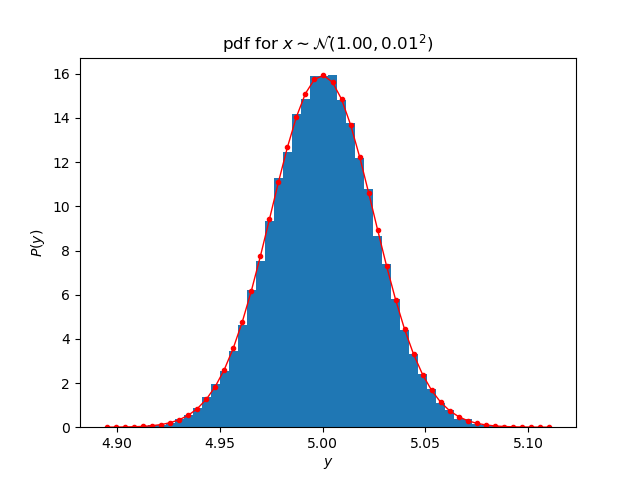

In [8]:
N=100000
x = 1
x_rel = 0.01
#x_rel = 0.4
ux = x_rel*x
# Sample from the normal distribution
xtilde = np.random.normal(x,ux,N)
ytilde = y(xtilde)
nbins = 50  # number of bins
plt.figure()
count, bins, ignored = plt.hist(ytilde, nbins, density=True)
bc = (bins[0:-1]+bins[1:])/2   # bin centres
plt.plot(bc, norm.pdf(bc,np.mean(ytilde),np.std(ytilde)), '.-',linewidth=1, color='r')
plt.xlabel('$y$')
plt.ylabel('$P(y)$')
plt.title('pdf for $x\sim\mathcal{N}(%.2f, %.2f^2)$'%(x,x_rel))
np.mean(ytilde),np.std(ytilde)/np.mean(ytilde)

### Hands-on:

Plot the model equation $y(x)$ with error bars indicating the 95% confidence intervals for different uncertainties in $x$.

---
---
---
---
---
---
---